In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import warnings
import h5py
import pandas as pd
import scipy.interpolate as scintrp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import savgol_filter as smooth

import windOF as foam
import windPlotting as wPlt
import wind
import windWT as wt

import winsound

In [35]:
Href = 10/30.0
# Href = 0.5

# Profiles

In [31]:
dtDir = r"D:/OneDrive - The University of Western Ontario/Documents/CollabWorks/groundMountedSolarPanel/data/TH_forTsinuel/"
file = dtDir + r"tgeE1_TH.mat"
print(os.path.isfile(file))

import scipy.io as sio


data = sio.loadmat(file)
Z = np.array(data['Z'])
# Href = data['Href'][0][0]
U_TH = np.array(data['UofT']).copy().T
V_TH = np.array(data['VofT']).copy().T*-1.0
W_TH = np.array(data['WofT']).copy().T*-1.0
fs = data['fs'][0][0]
dt = 1/data['fs'][0][0]
print(f"Shapes: \tUofT: {U_TH.shape}, \tVofT: {V_TH.shape}, \tWofT: {W_TH.shape}, \tZ: {Z.shape}")
print(f"dt = {dt}, \tHref = {Href}, \tfs = {fs}")
wtVel_E1 = wind.profile(name="BLWT-E1", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=Href,dt=dt,nSpectAvg=80)

file = dtDir + r"tgeE2_TH.mat"
print(os.path.isfile(file))
data = sio.loadmat(file)
print(data.keys())
Z = np.array(data['Z'])
# Href = data['Href'][0][0]
U_TH = np.array(data['UofT']).copy().T
V_TH = np.array(data['VofT']).copy().T*-1.0
W_TH = np.array(data['WofT']).copy().T*-1.0
fs = data['fs'][0][0]
dt = 1/data['fs'][0][0]
print(f"Shapes: \tUofT: {U_TH.shape}, \tVofT: {V_TH.shape}, \tWofT: {W_TH.shape}, \tZ: {Z.shape}")
print(f"dt = {dt}, \tHref = {Href}, \tfs = {fs}")
wtVel_E2 = wind.profile(name="BLWT-E2", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=Href,dt=dt,nSpectAvg=80)


file = dtDir + r"tgeE3_TH.mat"
print(os.path.isfile(file))
data = sio.loadmat(file)
print(data.keys())
Z = np.array(data['Z'])
# Href = data['Href'][0][0]
U_TH = np.array(data['UofT']).copy().T
V_TH = np.array(data['VofT']).copy().T*-1.0
W_TH = np.array(data['WofT']).copy().T*-1.0
fs = data['fs'][0][0]
dt = 1/data['fs'][0][0]
print(f"Shapes: \tUofT: {U_TH.shape}, \tVofT: {V_TH.shape}, \tWofT: {W_TH.shape}, \tZ: {Z.shape}")
print(f"dt = {dt}, \tHref = {Href}, \tfs = {fs}")
wtVel_E3 = wind.profile(name="BLWT-E3", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=Href,dt=dt,nSpectAvg=80)


vel_allWT = wind.Profiles([wtVel_E1, wtVel_E2, wtVel_E3, ])

True
Shapes: 	UofT: (28, 376832), 	VofT: (28, 376832), 	WofT: (28, 376832), 	Z: (28, 1)
dt = 0.0008, 	Href = 0.3333333333333333, 	fs = 1250
True
dict_keys(['__header__', '__version__', '__globals__', 'Href', 'UofT', 'VofT', 'WofT', 'Z', 'fs'])
Shapes: 	UofT: (28, 376832), 	VofT: (28, 376832), 	WofT: (28, 376832), 	Z: (28, 1)
dt = 0.0008, 	Href = 0.3333333333333333, 	fs = 1250
True
dict_keys(['__header__', '__version__', '__globals__', 'Href', 'UofT', 'VofT', 'WofT', 'Z', 'fs'])
Shapes: 	UofT: (27, 376832), 	VofT: (27, 376832), 	WofT: (27, 376832), 	Z: (27, 1)
dt = 0.0008, 	Href = 0.3333333333333333, 	fs = 1250


In [36]:

file = dtDir + r"tgeE3run2_TH.mat"
print(os.path.isfile(file))
data = sio.loadmat(file)
print(data.keys())
Z = np.array(data['Z'])
# Href = data['Href'][0][0]
U_TH = data['cobraU'][0]

tDim = np.shape(U_TH[1])[0]
zDim = len(Z)
U_TH = np.squeeze(np.array([U_TH[i][:tDim] for i in range(len(U_TH))]))
V_TH = data['cobraV'][0]
V_TH = np.squeeze(np.array([V_TH[i][:tDim] for i in range(len(V_TH))]))
W_TH = data['cobraW'][0]
W_TH = np.squeeze(np.array([W_TH[i][:tDim] for i in range(len(W_TH))]))
fs = data['fs'][0][0]
dt = 1/data['fs'][0][0]
print(f"Shapes: \tUofT: {U_TH.shape}, \tVofT: {V_TH.shape}, \tWofT: {W_TH.shape}, \tZ: {Z.shape}")
print(f"dt = {dt}, \tHref = {Href}, \tfs = {fs}")
wtVel_E3run2 = wind.profile(name="BLWT-E3run2", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=Href,dt=dt,nSpectAvg=48)


True
dict_keys(['__header__', '__version__', '__globals__', 'Href', 'Z', 'cobraU', 'cobraV', 'cobraW', 'fs'])
Shapes: 	UofT: (22, 225280), 	VofT: (22, 225280), 	WofT: (22, 225280), 	Z: (22, 1)
dt = 0.0008, 	Href = 0.3333333333333333, 	fs = 1250


In [37]:

file = dtDir + r"tgeE2run2_TH.mat"
print(os.path.isfile(file))
data = sio.loadmat(file)
print(data.keys())
Z = np.array(data['Z'])
# Href = data['Href'][0][0]
U_TH = data['cobraU'][0]

tDim = np.shape(U_TH[1])[0]
zDim = len(Z)
U_TH = np.squeeze(np.array([U_TH[i][:tDim] for i in range(len(U_TH))]))
V_TH = data['cobraV'][0]
V_TH = np.squeeze(np.array([V_TH[i][:tDim] for i in range(len(V_TH))]))
W_TH = data['cobraW'][0]
W_TH = np.squeeze(np.array([W_TH[i][:tDim] for i in range(len(W_TH))]))
fs = data['fs'][0][0]
dt = 1/data['fs'][0][0]
print(f"Shapes: \tUofT: {U_TH.shape}, \tVofT: {V_TH.shape}, \tWofT: {W_TH.shape}, \tZ: {Z.shape}")
print(f"dt = {dt}, \tHref = {Href}, \tfs = {fs}")
wtVel_E2run2 = wind.profile(name="BLWT-E2run2", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=Href,dt=dt,nSpectAvg=48)

vel_E2 = wind.Profiles([wtVel_E2, wtVel_E2run2, ])
vel = wind.Profiles([wtVel_E3, wtVel_E3run2, ])

True
dict_keys(['__header__', '__version__', '__globals__', 'Href', 'Z', 'cobraU', 'cobraV', 'cobraW', 'fs'])
Shapes: 	UofT: (28, 225280), 	VofT: (28, 225280), 	WofT: (28, 225280), 	Z: (28, 1)
dt = 0.0008, 	Href = 0.3333333333333333, 	fs = 1250


In [53]:
lsc = 1/30.0
z0 = 0.01
es85a = wind.ESDU85(z0=z0, Zref=Href/lsc, Uref=26.0, Z=np.logspace(-1,2.5,100))
es74a = wind.ESDU74(z0=z0, Zref=Href/lsc, Uref=26.0, Z=np.logspace(-1,2.5,100))
z0 = 0.03
es85b = wind.ESDU85(z0=z0, Zref=Href/lsc, Uref=26.0, Z=np.logspace(-1,2.5,100))
es74b = wind.ESDU74(z0=z0, Zref=Href/lsc, Uref=26.0, Z=np.logspace(-1,2.5,100))
z0 = 0.1
es85c = wind.ESDU85(z0=z0, Zref=Href/lsc, Uref=26.0,) # Z=np.logspace(-0.1,2.5,100))
es74c = wind.ESDU74(z0=z0, Zref=Href/lsc, Uref=26.0,) # Z=np.logspace(-0.1,2.5,100))
z0 = 0.15
es85d = wind.ESDU85(z0=z0, Zref=Href/lsc, Uref=26.0,) # Z=np.logspace(-0.15,2.5,100))
es74d = wind.ESDU74(z0=z0, Zref=Href/lsc, Uref=26.0,) # Z=np.logspace(-0.15,2.5,100))

vel74 = wind.Profiles([wtVel_E1, wtVel_E2, wtVel_E3, es74a.toProfileObj(), es74b.toProfileObj(),])
vel85 = wind.Profiles([wtVel_E1, wtVel_E2, wtVel_E3, es85a.toProfileObj(), es85b.toProfileObj(),])
vel = wind.Profiles([wtVel_E1, wtVel_E2, wtVel_E3, 
                     es74a.toProfileObj(), es74b.toProfileObj(), es74c.toProfileObj(),
                     es85a.toProfileObj(), es85b.toProfileObj(), es85c.toProfileObj(),])

es = es85c.toProfileObj()
es.SpectH = es74c.toProfileObj().SpectH

vel = wind.Profiles([wtVel_E3run2, es, ])

In [47]:
file = dtDir + r"profExp17.csv"
data = pd.read_csv(file, )
print(data.columns)

inch2m = 0.0254
target = pd.DataFrame()
target['U'] = data['VmeanH/VmeanRef']
target['Z'] = data['H(inches)']*inch2m
target['Iu'] = data['Iu(%)']*0.01


Index(['H(inches)', 'VmeanH/VmeanRef', 'Iu(%)'], dtype='object')


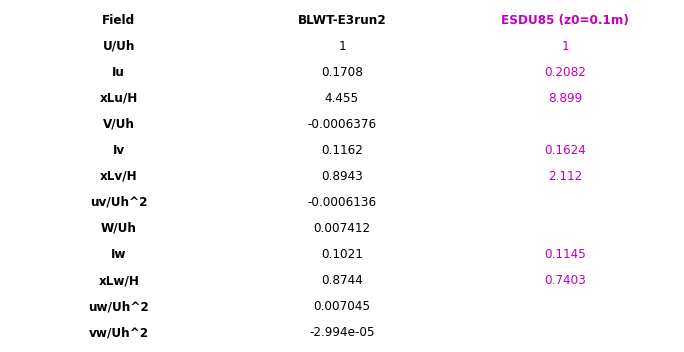

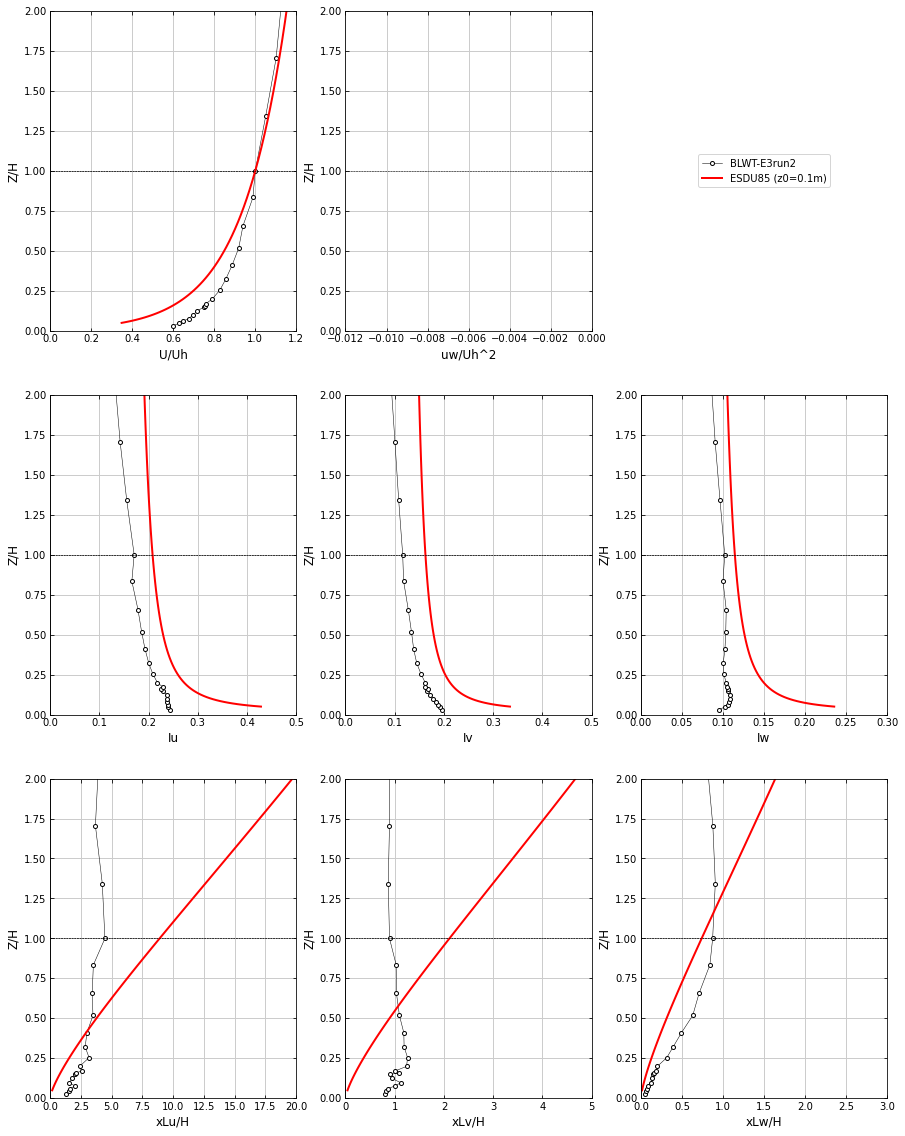

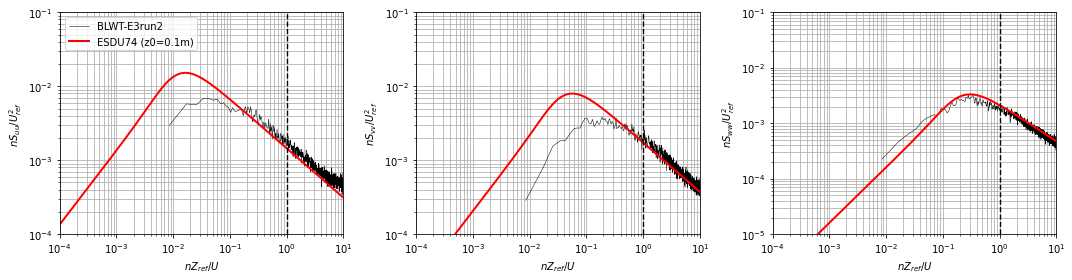

In [54]:
fig, ax = vel.plotRefHeightStatsTable(colTxtColors=['k','m','g','r','b','c','r','b','c'], 
                                      fontSz=12,)
# fig.savefig(dtDir+'refHeightStats_reE3.svg', dpi=300, bbox_inches='tight')

fig, axs = vel.plotProfile_basic2(figsize=[15,20],
                        yLimits=[0,2],
                        xLimits_U=[0, 1.2], xLimits_uw=[-0.012, 0.0],
                        xLimits_Iu=[0,0.5], xLimits_Iv=[0,0.5], xLimits_Iw=[0,0.3],
                        # xLimits_xLu=[0, 100], xLimits_xLv=[0,50], xLimits_xLw=[0,12],
                        xLimits_xLu=[0, 20], xLimits_xLv=[0,5], xLimits_xLw=[0,3],
                        kwargs_plt=[{'lw':0.5, 'ls':'-', 'color':'k', 'marker':'o', 'ms':4, 'mfc':'w', }, 
                                    # {'lw':0.5, 'ls':'-', 'color':'m', 'marker':'d', 'ms':4, 'mfc':'w', },
                                    # {'lw':0.5, 'ls':'-', 'color':'g', 'marker':'s', 'ms':4, 'mfc':'w', },
                                    {'lw':2, 'ls':'-', 'color':'r'},
                                    {'lw':2, 'ls':'-', 'color':'b'},
                                    {'lw':2, 'ls':'-', 'color':'c'},
                                    {'lw':2, 'ls':'--', 'color':'r'},
                                    {'lw':2, 'ls':'--', 'color':'b'},
                                    {'lw':2, 'ls':'--', 'color':'c'},
                                    ],
                        )
# axs[0,0].plot(target['U'], target['Z']/Href, 'k-', lw=2)
# axs[1,0].plot(target['Iu'], target['Z']/Href, 'k-', lw=2)
# fig.savefig(dtDir+'profiles_reE3.svg', dpi=300, bbox_inches='tight')

fig = vel.plotSpectra(figSize=[15,4],
                    yLimits=[[1e-4,1e-1],[1e-4,1e-1],[1e-5,1e-1]],
                    xLimits=[1e-4,10],
                    kwargs_plt=[{'lw':0.5, 'ls':'-', 'color':'k', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                                # {'lw':0.5, 'ls':'-', 'color':'m', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                                # {'lw':0.5, 'ls':'-', 'color':'g', 'marker':'None', 'ms':4, 'mfc':'w', }, 
                                    {'lw':2, 'ls':'-', 'color':'r'},
                                    {'lw':2, 'ls':'-', 'color':'b'},
                                    {'lw':2, 'ls':'-', 'color':'c'},
                                    {'lw':2, 'ls':'--', 'color':'r'},
                                    {'lw':2, 'ls':'--', 'color':'b'},
                                    {'lw':2, 'ls':'--', 'color':'c'},
                                    ],
                    )
# fig.savefig(dtDir+'spectra_reE3.svg', dpi=300, bbox_inches='tight')

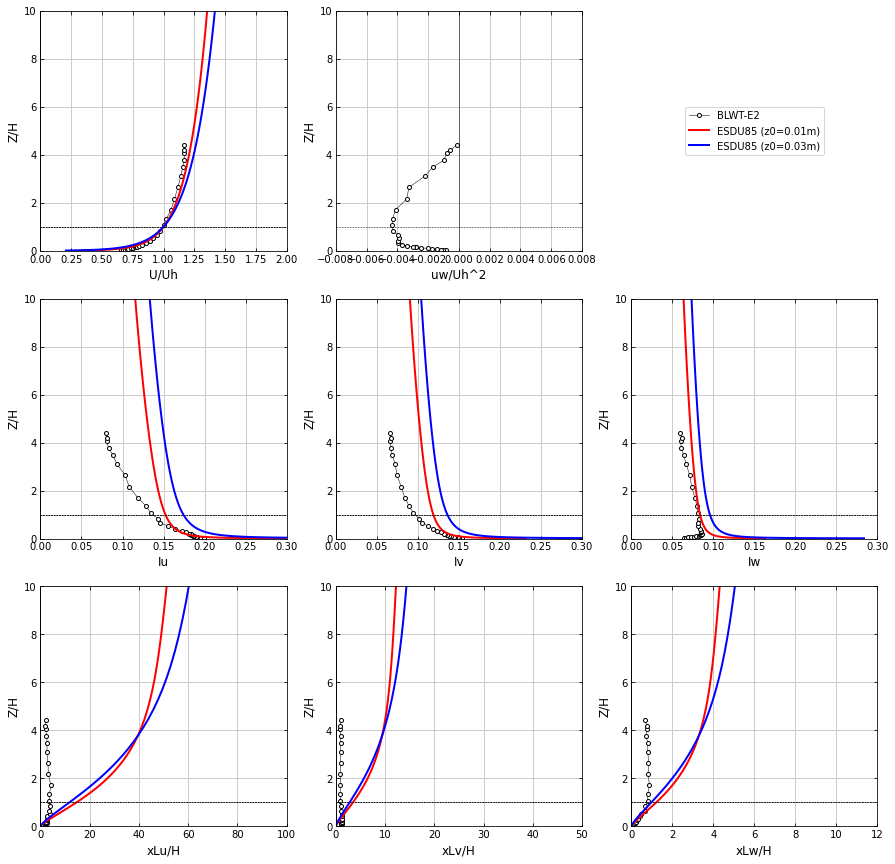

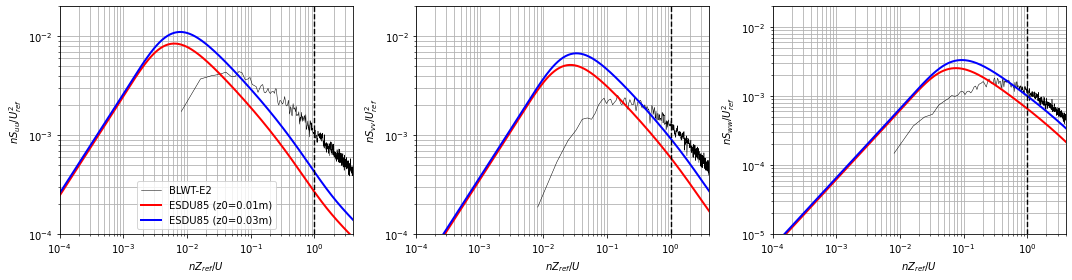

In [7]:

vel = wind.Profiles([wtVel_E2, #es74a.toProfileObj(), es74b.toProfileObj(), 
                     es85a.toProfileObj(), es85b.toProfileObj(),])

fig, axs = vel.plotProfile_basic2(figsize=[15,15],
                        yLimits=[0,10],
                        xLimits_U=[0, 2], xLimits_uw=[-0.008, 0.008],
                        xLimits_Iu=[0,0.3], xLimits_Iv=[0,0.3], xLimits_Iw=[0,0.3],
                        xLimits_xLu=[0, 100], xLimits_xLv=[0,50], xLimits_xLw=[0,12],
                        kwargs_plt=[{'lw':0.5, 'ls':'-', 'color':'k', 'marker':'o', 'ms':4, 'mfc':'w', },
                                    {'lw':2, 'ls':'-', 'color':'r'},
                                    {'lw':2, 'ls':'-', 'color':'b'},
                                    {'lw':2, 'ls':'--', 'color':'r'},
                                    {'lw':2, 'ls':'--', 'color':'b'},
                                    ],
                        )
fig.savefig(dtDir+'profiles_E2.svg', dpi=300, bbox_inches='tight')

fig = vel.plotSpectra(figSize=[15,4],
                    yLimits=[[1e-4,2e-2],[1e-4,2e-2],[1e-5,2e-2]],
                    xLimits=[1e-4,4],
                    kwargs_plt=[{'lw':0.5, 'ls':'-', 'color':'k', 'marker':'None', 'ms':4, 'mfc':'w', },
                                    {'lw':2, 'ls':'-', 'color':'r'},
                                    {'lw':2, 'ls':'-', 'color':'b'},
                                    {'lw':2, 'ls':'--', 'color':'r'},
                                    {'lw':2, 'ls':'--', 'color':'b'},
                                    ],
                    )
fig.savefig(dtDir+'spectra_E2.svg', dpi=300, bbox_inches='tight')

# HFPI

In [43]:
casedir = r"F:/TGE01_E3/"

In [44]:
analogChannels_idxs={
                'main_pitot': 0,
                'xcheck_pitot': 2,
            }
pressureExtraChannels_tapNos={
                'main_pitot_zero': 5909,
                'main_pitot_queue': 5910,
                '20inch_pitot_zero': 5907,
                '20inch_pitot_queue': 5908,
                'Uh_pitot_zero': 5905,
                'Uh_pitot_queue': 5906,
            }

peakSpecs = wind.DEFAULT_PEAK_SPECS
peakSpecs['Num_seg'] = 10
peakSpecs['Duration'] = 10
peakSpecs['prob_non_excd'] = 0.8

In [45]:
cp_raw = wt.BLWTL_HFPI(
    caseDir=casedir,
    userNotes=None,
    Z_MainPitot=1.48,
    analogChannels_idxs=analogChannels_idxs,
    pressureExtraChannels_tapNos=pressureExtraChannels_tapNos,
    # lowpassFreq=200.0,
    # lowpassFreq=222.223,
    # Ntaps=440,
)
winsound.Beep(1000, 1000)


Reading HFPI data from: F:/TGE01_E3/
   Reading file: F:/TGE01_E3/TGE01E03R001P001a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P002a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P003a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P004a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P005a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P006a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P007a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P008a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P009a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P010a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P011a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P012a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P013a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P014a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P015a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P016a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P017a.pssd
   Reading file: F:/TGE01_E3/TGE01E03R001P018a.pssd
   Reading file: F:/TGE01_E

In [46]:

cp = wind.bldgCp(
                # bldgName=bldg_iso.name,
                # faces=bldg_iso.faces,
                # H=H,D=D,B=B,roofSlope=roofSlope,lScl=lScl,
                # AoA_zero_deg_basisVector=bldg_iso.AoA_zero_deg_basisVector,
                # AoA_rotation_direction=bldg_iso.AoA_rotation_direction,
                # caseName=caseName_iso_OP,
                # refProfile=vel_OP,
                Zref_input=cp_raw.Z_MainPitot,
                Uref_input=cp_raw.Uref,
                samplingFreq=cp_raw.sampleRate,
                notes_Cp=cp_raw.description,
                tapNos=cp_raw.tapNos[:-16],
                AoA=cp_raw.AoA,
                CpOfT=cp_raw.CpTH,
                badTaps=None,
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakSpecs=peakSpecs,
                keepTH=False,
                )
winsound.Beep(1000, 1000)

Refreshing myBuilding_testCase...
Verifying data ...
Computing Cp statistics ...
Done refreshing myBuilding_testCase.



In [92]:
min_AoA, max_AoA = 64.3, 191.76
min_AoA, max_AoA = 11, 181
# round to the nearest 5
min_AoA = np.floor(min_AoA/5)*5
max_AoA = np.ceil(max_AoA/5)*5
# array of xticks for AoA rounded to the nearest 5 degrees the final array should be close to 10 not necessarily equal to 10
# xticks = np.floor(np.linspace(min_AoA, max_AoA, int((max_AoA-min_AoA)/80)+1)/5)*5
xticks = np.unique(np.floor(np.linspace(min_AoA, max_AoA, 150)/5)*5)
print(xticks)

a, b = [2, 4]
print(a)

[ 10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.
  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 140. 145.
 150. 155. 160. 165. 170. 175. 180. 185.]
2


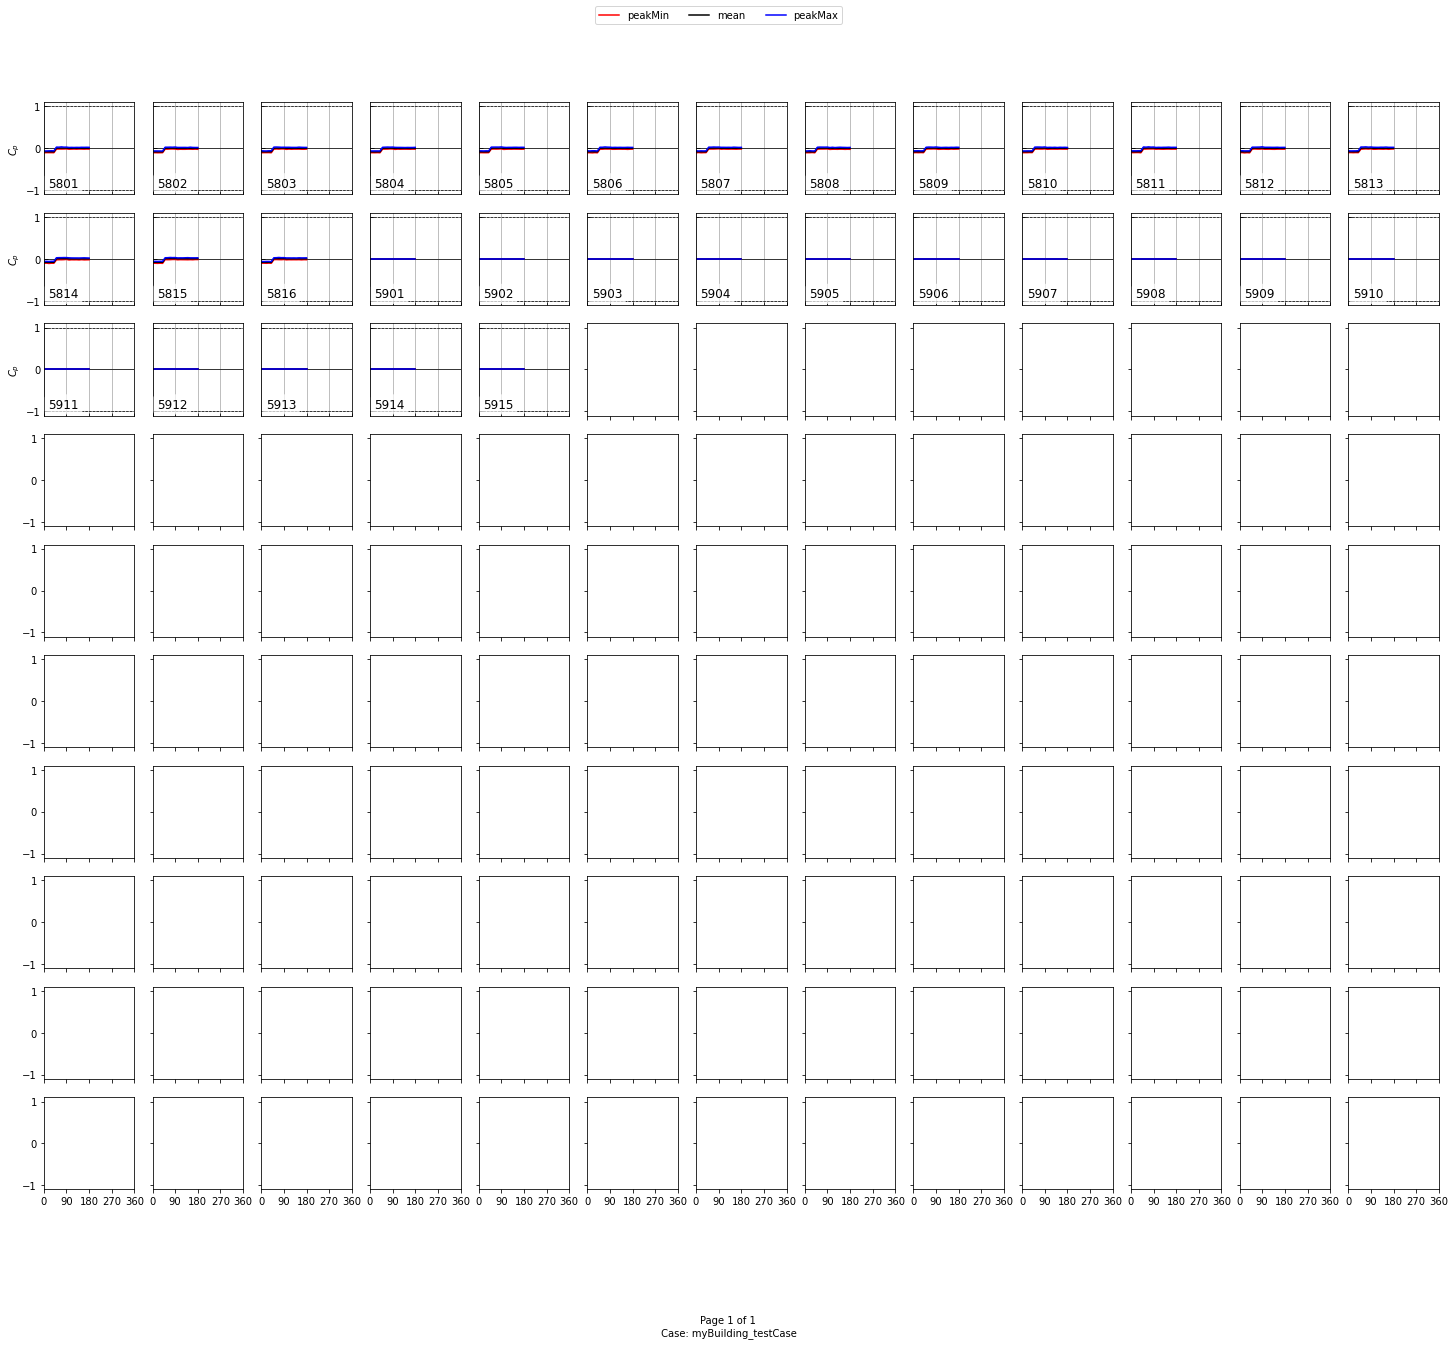

In [94]:
_ = cp.plotTapCpStatsPerAoA(tapsToPlot=cp.tapNo[-31:],
                mrkrs=['None','None','None'], fldRange=[-1.1,1.1],
                legend_bbox_to_anchor=(0.5, 0.95),
                pageNo_xy=(0.5,0.03), nCols=13, figsize=[25,20], 
                xlim=[0,360],
                # xticks=np.arange(0,190,30)
                )
